# Stickers Sold Notebook
**Author: *Kamau Wa Wainaina***

## Frame the problem and look at the big picture
The problem is trying to know sticker sales in different parts of the world. Performance will be assessed using root mean squared error.

## Get the data

In [4]:
# Libraries used in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
path = "../../../Data/playground-series-s5e1/"
train = pd.read_csv(path+"train.csv",
                    index_col=["date"],
                    parse_dates=["date"])
test = pd.read_csv(path+"test.csv", 
                   index_col=["date"],
                   parse_dates=["date"])

## Explore data to gain insights

### Light Exploration

In [8]:
train.head()

id country              store             product  num_sold
date                                                                   
2010-01-01   0  Canada  Discount Stickers   Holographic Goose       NaN
2010-01-01   1  Canada  Discount Stickers              Kaggle     973.0
2010-01-01   2  Canada  Discount Stickers        Kaggle Tiers     906.0
2010-01-01   3  Canada  Discount Stickers            Kerneler     423.0
2010-01-01   4  Canada  Discount Stickers  Kerneler Dark Mode     491.0

Only number sold column is missing values.

In [10]:
train.describe(include="all")

id country              store            product  \
count   230130.000000  230130             230130             230130   
unique            NaN       6                  3                  5   
top               NaN  Canada  Discount Stickers  Holographic Goose   
freq              NaN   38355              76710              46026   
mean    115064.500000     NaN                NaN                NaN   
std      66432.953062     NaN                NaN                NaN   
min          0.000000     NaN                NaN                NaN   
25%      57532.250000     NaN                NaN                NaN   
50%     115064.500000     NaN                NaN                NaN   
75%     172596.750000     NaN                NaN                NaN   
max     230129.000000     NaN                NaN                NaN   

             num_sold  
count   221259.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean       752.527382  
std        690.165445  
min          5.000000  
25%        219.000000  
50%        605.000000  
75%       1114.000000  
max       5939.000000

### Exploratory Data Analysis

In [12]:
exploration_data = train.drop("id", axis=1).copy()

Let's see number sold per country

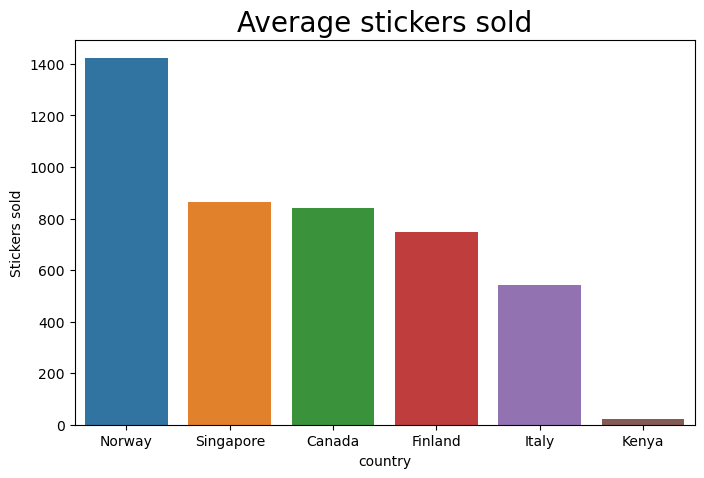

In [14]:
num_sold_country = exploration_data.groupby("country")["num_sold"].mean()
num_sold_country = num_sold_country.reset_index()
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x="country", 
            y="num_sold", 
            data=num_sold_country, 
            order=["Norway", "Singapore", "Canada", "Finland", "Italy", "Kenya"],
            ax=ax)
ax.set_ylabel("Stickers sold")
ax.set_title("Average stickers sold", size=20)
plt.show()

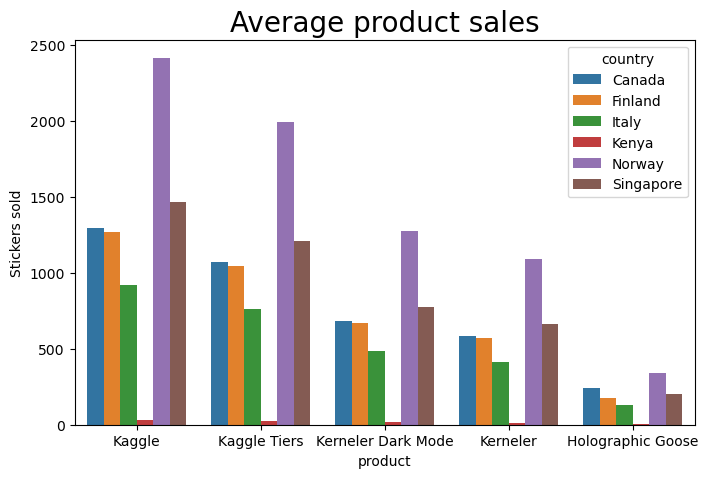

In [15]:
num_sold_product = exploration_data.groupby(["product", "country"])["num_sold"].mean().reset_index()
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x="product", 
            y="num_sold",
            hue="country",
            data=num_sold_product, 
            order=["Kaggle", "Kaggle Tiers", "Kerneler Dark Mode", "Kerneler", "Holographic Goose"],
            ax=ax)
ax.set_ylabel("Stickers sold")
ax.set_title("Average product sales", size=20)
plt.show()

In [16]:
null_num_sold = exploration_data[pd.isnull(exploration_data["num_sold"])].copy()

In [17]:
null_num_sold["num_sold"] = null_num_sold["num_sold"].isnull()
null_num_sold = null_num_sold.groupby(["country", "store"])["num_sold"].count().reset_index()
null_num_sold

country                 store  num_sold
0  Canada     Discount Stickers      2558
1  Canada  Premium Sticker Mart       380
2  Canada     Stickers for Less      1308
3   Kenya     Discount Stickers      2621
4   Kenya  Premium Sticker Mart       646
5   Kenya     Stickers for Less      1358

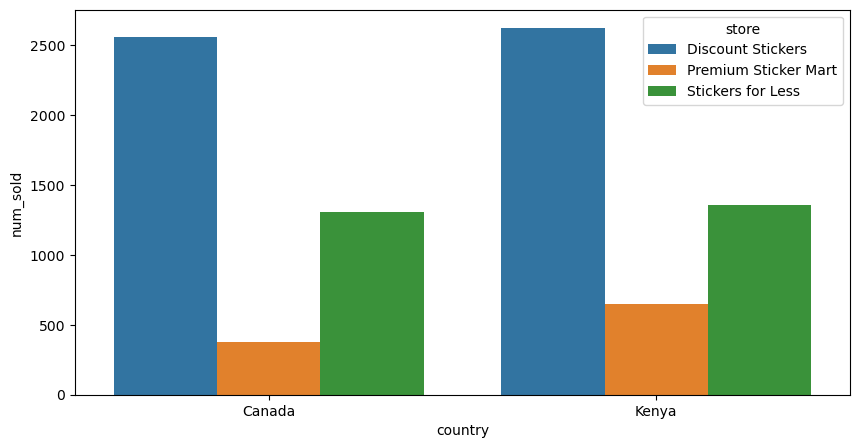

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x="country",
            y="num_sold", 
            hue="store",
            data=null_num_sold, 
            ax=ax)
plt.show()

## Model Building

In [35]:
train = train.drop("id", axis=1).reset_index()
train.head()

date country              store             product  num_sold
0 2010-01-01  Canada  Discount Stickers   Holographic Goose       NaN
1 2010-01-01  Canada  Discount Stickers              Kaggle     973.0
2 2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0
3 2010-01-01  Canada  Discount Stickers            Kerneler     423.0
4 2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0

In [39]:
train.groupby(["date", "country", "product"])["num_sold"].mean()

date        country    product           
2010-01-01  Canada     Holographic Goose      337.500000
                       Kaggle                1674.000000
                       Kaggle Tiers          1526.000000
                       Kerneler               726.666667
                       Kerneler Dark Mode     881.333333
                                                ...     
2016-12-31  Singapore  Holographic Goose      350.000000
                       Kaggle                2182.000000
                       Kaggle Tiers          1777.666667
                       Kerneler               950.000000
                       Kerneler Dark Mode    1190.333333
Name: num_sold, Length: 76710, dtype: float64

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      230130 non-null  datetime64[ns]
 1   country   230130 non-null  object        
 2   store     230130 non-null  object        
 3   product   230130 non-null  object        
 4   num_sold  221259 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 8.8+ MB


In [75]:
train.iloc[0]

date        2010-01-01 00:00:00
country                  Canada
store         Discount Stickers
product       Holographic Goose
num_sold                    NaN
Name: 0, dtype: object

In [ ]:
df_length = len(train)
for row in range(df_length):
    if train.iloc[row][]


date        2010-01-01 00:00:00
country                  Canada
store         Discount Stickers
product       Holographic Goose
num_sold                    NaN
Name: 0, dtype: object
date        2010-01-01 00:00:00
country                  Canada
store         Discount Stickers
product                  Kaggle
num_sold                  973.0
Name: 1, dtype: object
date        2010-01-01 00:00:00
country                  Canada
store         Discount Stickers
product            Kaggle Tiers
num_sold                  906.0
Name: 2, dtype: object
date        2010-01-01 00:00:00
country                  Canada
store         Discount Stickers
product                Kerneler
num_sold                  423.0
Name: 3, dtype: object
date        2010-01-01 00:00:00
country                  Canada
store         Discount Stickers
product      Kerneler Dark Mode
num_sold                  491.0
Name: 4, dtype: object
date        2010-01-01 00:00:00
country                  Canada
store         Sticker